# Transforming Data 
***
## Transforming DataFrames


### Inspecting a DataFrame


When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.
<ul>
    <li><code>head()</code> returns the first few rows (the “head” of the DataFrame).</li>
    <li><code>info()</code> shows information on each of the columns, such as the data type and number of missing values.</li>
    <li><code>.shape</code> returns the number of rows and columns of the DataFrame.</li>
    <li><code>describe()</code> calculates a few summary statistics for each column.</li>
</ul>
homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018. The individual column is the number of homeless individuals not part of a family with children. The family_members column is the number of homeless individuals part of a family with children. The state_pop column is the state's total population.


In [2]:
import pandas as pd

# Saves the "data" with the "title" and adds the .pickle
homelessness = pd.read_pickle("./Datasets/Data Manipulation with Pandas/homeless_data.pkl")


# Print the head of the homelessness data
print(homelessness.head())

print()

# Print information about homelessness
print(homelessness.info())

print()

# Print the shape of homelessness
print(homelessness.shape)

print()

# Print a description of homelessness
print(homelessness.describe())

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama       2570.0           864.0    4887681
1             Pacific      Alaska       1434.0           582.0     735139
2            Mountain     Arizona       7259.0          2606.0    7158024
3  West South Central    Arkansas       2280.0           432.0    3009733
4             Pacific  California     109008.0         20964.0   39461588

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
region            51 non-null object
state             51 non-null object
individuals       51 non-null float64
family_members    51 non-null float64
state_pop         51 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB
None

(51, 5)

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811 

### Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

.values: A two-dimensional NumPy array of values.

.columns: An index of columns: the column names.

.index: An index for the rows: either row numbers or row names.

You can usually think of indexes as being like a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. (These will be covered later in the course.)

In [40]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)
print()

# Print the column index of homelessness
print(homelessness.columns)
print()

# Print the row index of homelessness
print(homelessness.index)

[['East South Central' 'Alabama' 2570.0 864.0 4887681]
 ['Pacific' 'Alaska' 1434.0 582.0 735139]
 ['Mountain' 'Arizona' 7259.0 2606.0 7158024]
 ['West South Central' 'Arkansas' 2280.0 432.0 3009733]
 ['Pacific' 'California' 109008.0 20964.0 39461588]
 ['Mountain' 'Colorado' 7607.0 3250.0 5691287]
 ['New England' 'Connecticut' 2280.0 1696.0 3571520]
 ['South Atlantic' 'Delaware' 708.0 374.0 965479]
 ['South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 ['South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 ['South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 ['Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 ['Mountain' 'Idaho' 1297.0 715.0 1750536]
 ['East North Central' 'Illinois' 6752.0 3891.0 12723071]
 ['East North Central' 'Indiana' 3776.0 1482.0 6695497]
 ['West North Central' 'Iowa' 1711.0 1038.0 3148618]
 ['West North Central' 'Kansas' 1443.0 773.0 2911359]
 ['East South Central' 'Kentucky' 2735.0 953.0 4461153]
 ['West South Central' 'Louisiana' 2540.0 519.0 4659690]
 ['New 

### Sorting rows
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to <code>.sort_values().</code>

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

Sort on …..............Syntax
<br>one column...........<code>df.sort_values("breed")</code>
<br>multiple columns...<code>df.sort_values(["breed", "weight_kg"])</code>

By combining <code>.sort_values()</code> with <code>.head()</code>, you can answer questions in the form, "What are the top cases where…?".

In [6]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
print(homelessness_ind.head())

                region         state  individuals  family_members  state_pop
50            Mountain       Wyoming        434.0           205.0     577601
34  West North Central  North Dakota        467.0            75.0     758080
7       South Atlantic      Delaware        708.0           374.0     965479
39         New England  Rhode Island        747.0           354.0    1058287
45         New England       Vermont        780.0           511.0     624358


In [8]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members', ascending=False)

# Print the top few rows
print (homelessness_fam.head())

                region          state  individuals  family_members  state_pop
32        Mid-Atlantic       New York      39827.0         52070.0   19530351
4              Pacific     California     109008.0         20964.0   39461588
21         New England  Massachusetts       6811.0         13257.0    6882635
9       South Atlantic        Florida      21443.0          9587.0   21244317
43  West South Central          Texas      19199.0          6111.0   28628666


In [9]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'], ascending=[True, False])

# Print the top few rows
print (homelessness_reg_fam.head())

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois       6752.0          3891.0   12723071
35  East North Central       Ohio       6929.0          3320.0   11676341
22  East North Central   Michigan       5209.0          3142.0    9984072
49  East North Central  Wisconsin       2740.0          2167.0    5807406
14  East North Central    Indiana       3776.0          1482.0    6695497


### Subsetting columns

When working with data, you may not need all of the variables in your dataset. Square-brackets <code>([])</code> can be used to select only the columns that matter to you in an order that makes sense to you. 

To select only <code>"col_a"</code> of the DataFrame <code>df</code>, use

df["col_a"]

To select "col_a" and "col_b" of df, use

df[["col_a", "col_b"]]


In [10]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

0      2570.0
1      1434.0
2      7259.0
3      2280.0
4    109008.0
Name: individuals, dtype: float64


In [11]:
# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head())

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0


In [12]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[["individuals", "state"]]

# Print the head of the result
print(ind_state.head())

   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California


### Subsetting rows

A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return <code>True</code> or <code>False</code> for each row, then pass that inside square brackets.

dogs[dogs["height_cm"] > 60]
<br>dogs[dogs["color"] == "tan"]

You can filter for multiple conditions at once by using the "logical and" operator, <code>&</code>.
<br>dogs[(dogs["height_cm"] > 60) & (dogs["col_b"] == "tan")]

In [13]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"]>10000]

# See the result
print(ind_gt_10k)

                region       state  individuals  family_members  state_pop
4              Pacific  California     109008.0         20964.0   39461588
9       South Atlantic     Florida      21443.0          9587.0   21244317
32        Mid-Atlantic    New York      39827.0         52070.0   19530351
37             Pacific      Oregon      11139.0          3337.0    4181886
43  West South Central       Texas      19199.0          6111.0   28628666
47             Pacific  Washington      16424.0          5880.0    7523869


In [14]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"]=="Mountain"]

# See the result
print(mountain_reg)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [15]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"]<1000) & (homelessness["region"]=="Pacific")]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


### Subsetting rows by categorical variables

Subsetting data based on a categorical variable often involves using the "or" operator <code>(|)</code> to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. Instead, use the <code>.isin()</code> method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

colors = ["brown", "black", "tan"]
<br>condition = dogs["color"].isin(colors)
<br>dogs[condition]


In [17]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"]=="South Atlantic")|(homelessness["region"]=="Mid-Atlantic")]

# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [18]:
# The Mojave Desert states
canu = homelessness["state"].isin(["California", "Arizona", "Nevada", "Utah"])

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[canu]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


### Adding new columns
You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as transforming, mutating, and feature engineering.

You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together, or by changing their units.

In [19]:
# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
print(homelessness)

                region                 state  individuals  family_members  \
0   East South Central               Alabama       2570.0           864.0   
1              Pacific                Alaska       1434.0           582.0   
2             Mountain               Arizona       7259.0          2606.0   
3   West South Central              Arkansas       2280.0           432.0   
4              Pacific            California     109008.0         20964.0   
5             Mountain              Colorado       7607.0          3250.0   
6          New England           Connecticut       2280.0          1696.0   
7       South Atlantic              Delaware        708.0           374.0   
8       South Atlantic  District of Columbia       3770.0          3134.0   
9       South Atlantic               Florida      21443.0          9587.0   
10      South Atlantic               Georgia       6943.0          2556.0   
11             Pacific                Hawaii       4131.0          2399.0   

### Combo-attack!
You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new pandas skills to find out.

In [23]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"]>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


***
## Aggregating DataFrames

### Mean and median
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.



In [41]:
import pandas as pd

# Saves the "data" with the "title" and adds the .csv
sales = pd.read_csv("./Datasets/Data Manipulation with Pandas/sales_subset.csv")

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
Unnamed: 0              10774 non-null int64
store                   10774 non-null in

### Summarizing dates
Summary statistics can also be calculated on date columns that have values with the data type <code>datetime64</code>. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [8]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


### Efficient summaries
While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.

The <code>.agg()</code> method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example,

<code>df['column'].agg(function)</code>

In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.M

In [14]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

print()

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))


16.58333333333334

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [15]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr,np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative statistics

Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far.

In [17]:
sales_1_1 = sales[(sales['department']==1)&(sales['store']==1)]

# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


### Dropping duplicates
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from <code>sales</code>.

In [27]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store', 'type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
print(store_depts.head())
print()
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset='date')

# Print date col of holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

### Counting categorical variables
Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:

<code># Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])</code>

<code># Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])</code>

In [29]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
41    12
30    12
23    12
24    12
25    12
26    12
27    12
28    12
29    12
31    12
21    12
32    12
33    12
34    12
35    12
36    12
38    12
40    12
22    12
20    12
42    12
9     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
10    12
      ..
82    12
83    12
85    12
87    12
90    12
91    12
67    12
60    12
59    12
58    12
56    12
55    12
54    12
52    12
51    12
94    12
49    12
95    12
47    12
46    12
96    12
45    12
97    12
92    12
99    11
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
26    0.012917
27    0.012917
28    0.012917
29    0.012917
31    0.012917
21    0.012917
32    0.012917
33    0.012917
34    0.012917
35    0.012917
36    0.012917
38    0.012917
40    0.012917
22    0.012917
20    0.012917
42    0.0129

### What percent of sales occurred at each store type?
While <code>.groupby()</code> is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using <code>.groupby()</code>. You can then use these numbers to see what proportion of Walmart's total sales were made at each type.

In [30]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


### Calculations with .groupby()
The <code>.groupby()</code> method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the <code>.groupby()</code> method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not.

In [32]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/ sum(sales["weekly_sales"])
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type","is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple grouped summaries
Earlier in this chapter, you saw that the <code>.agg()</code> method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including: <code>np.min</code>, <code>np.max</code>, <code>np.mean</code>, and <code>np.median</code>.

In [33]:
# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby("type")["weekly_sales"].agg([min, max, np.mean, np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby("type")[["unemployment","fuel_price_usd_per_l"]].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

         min        max          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


### Pivoting on one variable
Pivot tables are the standard way of aggregating data in spreadsheets. In pandas, pivot tables are essentially just another way of performing grouped calculations. That is, the <code>.pivot_table()</code> method is just an alternative to <code>.groupby()</code>.

In this exercise, you'll perform calculations using <code>.pivot_table()</code> to replicate the calculations you performed in the last lesson using <code>.groupby()</code>.

In [34]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [35]:
# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table( values ="weekly_sales", index ="type", aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [36]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table( values ="weekly_sales", index ="type", columns ="is_holiday")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


### Fill in missing values and sum values with pivot tables
The <code>.pivot_table()</code> method has several useful arguments, including <code>fill_value</code> and <code>margins</code>.

<br><li><code>fill_value</code> replaces missing values with a real value (known as imputation). What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute a dummy value.</li></br>
<li><code>margins</code> is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.</li>
<br>In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!

In [38]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values ="weekly_sales", index ="department", columns ="type", fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
6             7136.292652   10717.297500
7            38454.336818   52909.653333
8            48583.475303   90733.753333
9            30120.449924   66679.301667
10           30930.456364   48595.126667
11           23028.312727   35488.429167
12            6786.840606    9656.520000
13           51398.168561   67213.587500
14           22457.695303   40400.020000
16           25202.751894   29558.182500
17           16167.586136   27675.351667
18           12201.771212   17361.347500
19            1560.951719    3365.895000
20            8312.070227   16191.810000
21            9324.387197   10368.968333
22           14225.324167   26044.797500
23           29350.745076   63960.273333
24            82

In [39]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value =0, margins =True))

type                    A              B            All
department                                             
1            30961.725379   44050.626667   32052.467153
2            67600.158788  112958.526667   71380.022778
3            17160.002955   30580.655000   18278.390625
4            44285.399091   51219.654167   44863.253681
5            34821.011364   63236.875000   37189.000000
6             7136.292652   10717.297500    7434.709722
7            38454.336818   52909.653333   39658.946528
8            48583.475303   90733.753333   52095.998472
9            30120.449924   66679.301667   33167.020903
10           30930.456364   48595.126667   32402.512222
11           23028.312727   35488.429167   24066.655764
12            6786.840606    9656.520000    7025.980556
13           51398.168561   67213.587500   52716.120139
14           22457.695303   40400.020000   23952.889028
16           25202.751894   29558.182500   25565.704444
17           16167.586136   27675.351667   17126

***
## Slicing and Indexing DataFrames

### Setting and removing indexes
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In this chapter, you'll be exploring <code>temperatures</code>, a DataFrame of average temperatures in cities around the world. 

In [42]:
import pandas as pd

# Saves the "data" with the "title" and adds the .csv
temperatures = pd.read_csv("./Datasets/Data Manipulation with Pandas/temperatures.csv")

# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
5               5  2000-06-01  Abidjan  Côte D'Ivoire      25.812
6               6  2000-07-01  Abidjan  Côte D'Ivoire      24.870
7               7  2000-08-01  Abidjan  Côte D'Ivoire      24.884
8               8  2000-09-01  Abidjan  Côte D'Ivoire      25.405
9               9  2000-10-01  Abidjan  Côte D'Ivoire      26.074
10             10  2000-11-01  Abidjan  Côte D'Ivoire      27.315
11             11  2000-12-01  Abidjan  Côte D'Ivoire      26.929
12             12  2001-01-01  Abidjan  Côte D'Ivoire      26.920
13             13  2001-02-01  Abidjan  Côte D'Ivoire      28.234
14        

### Subsetting with .loc[]
The killer feature for indexes is <code>.loc[]</code>: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.

The code for subsetting using <code>.loc[]</code> can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [43]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
10730       10730  2000-06-01            Moscow  Russia      15.243
10731       10731  2000-07-01            Moscow  Russia      18.676
10732       10732  2000-08-01            Moscow  Russia      16.420
10733       10733  2000-09-01            Moscow  Russia       9.775
10734       10734  2000-10-01            Moscow  Russia       6.611
10735       10735  2000-11-01            Moscow  Russia      -0.168
10736       10736  2000-12-01            Moscow  Russia      -2.954
10737       10737  2001-01-01            Moscow  Russia      -4.914
10738       10738  2001-02-01            Moscow 

### Setting multi-level indexes
Indexes can also be made out of multiple columns, forming a multi-level index (sometimes called a hierarchical index). There is a trade-off to using these.

The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country.

The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.

In [44]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country", "city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ("Pakistan", "Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
         Rio De Janeiro       12545  2000-06-01      24.059
         Rio De Janeiro       12546  2000-07-01      22.049
         Rio De Janeiro       12547  2000-08-01      22.447
         Rio De Janeiro       12548  2000-09-01      22.099
         Rio De Janeiro       12549  2000-10-01      23.844
         Rio De Janeiro       12550  2000-11-01      23.601
         Rio De Janeiro       12551  2000-12-01      25.209
         Rio De Janeiro       12552  2001-01-01      26.852
         Rio De Janeiro       12553  2001-02-01      27.992
         Rio De Janeiro       12554  200

### Sorting by index values
Previously, you changed the order of the rows in a DataFrame by calling <code>.sort_values()</code>. It's also useful to be able to sort by elements in the index. For this, you need to use <code>.sort_index()</code>.

In [45]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print( temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(ascending=[True, False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
            Kabul         7265  2000-06-01      25.582
            Kabul         7266  2000-07-01      26.107
            Kabul         7267  2000-08-01      25.459
            Kabul         7268  2000-09-01      22.116
            Kabul         7269  2000-10-01      16.806
            Kabul         7270  2000-11-01       9.720
            Kabul         7271  2000-12-01       5.107
            Kabul         7272  2001-01-01       2.208
            Kabul         7273  2001-02-01       5.567
            Kabul         7274  2001-03-01      10.807
            Kabul         7275  2001-04-01      16.587
          

### Slicing index values
Slicing lets you select consecutive elements of an object using <code>first:last</code> syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the <code>.loc[]</code> method.

Compared to slicing lists, there are a few things to remember.

<li>You can only slice an index if the index is sorted (using <code>.sort_index()</code>).
<li>To slice at the outer level, <code>first</code> and <code>last</code> can be strings.
<li>To slice at inner levels, <code>first</code> and <code>last</code> should be tuples.
<li>If you pass a single slice to <code>.loc[]</code>, it will slice the rows.

In [46]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind. sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
         Faisalabad              4790  2000-06-01      34.299
         Faisalabad              4791  2000-07-01      32.302
         Faisalabad              4792  2000-08-01      32.255
         Faisalabad              4793  2000-09-01      30.438
         Faisalabad              4794  2000-10-01      27.395
         Faisalabad              4795  2000-11-01      20.640
         Faisalabad              4796  2000-12-01      15.195
         Faisalabad              4797  2001-01-01      11.853
         Faisalabad              4798  2001-02-01      16.701
        

### Slicing in both directions
You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to <code>.loc[]</code>, you can subset by rows and columns in one go.

In [47]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq","Baghdad")])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":"avg_temp_c"])

# Subset in both directions at once
print(temperatures_srt.loc[("India", "Hyderabad"):("Iraq","Baghdad"), "date":"avg_temp_c"])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
        Hyderabad        5945  2000-06-01      28.422
        Hyderabad        5946  2000-07-01      27.137
        Hyderabad        5947  2000-08-01      26.576
        Hyderabad        5948  2000-09-01      27.433
        Hyderabad        5949  2000-10-01      26.927
        Hyderabad        5950  2000-11-01      24.776
        Hyderabad        5951  2000-12-01      21.949
        Hyderabad        5952  2001-01-01      23.406
        Hyderabad        5953  2001-02-01      26.677
        Hyderabad        5954  2001-03-01      29.393
        Hyderabad        5955  2001-04-01      31.289
        Hyderabad        595

### Slicing time series
Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the <code>date</code> column to the index, then use <code>.loc[]</code> to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, <code>"yyyy-mm-dd"</code> for year-month-day, <code>"yyyy-mm"</code> for year-month, and <code>"yyyy"</code> for year.

Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as <code>&</code>. To do so in one line of code, you'll need to add parentheses <code>()</code> around each condition.

In [48]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date'] >= '2010-01-01') & (temperatures['date'] <= '2011-12-31')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-02'])

       Unnamed: 0        date         city        country  avg_temp_c
120           120  2010-01-01      Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01      Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01      Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01      Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01      Abidjan  Côte D'Ivoire      28.258
125           125  2010-06-01      Abidjan  Côte D'Ivoire      26.683
126           126  2010-07-01      Abidjan  Côte D'Ivoire      25.589
127           127  2010-08-01      Abidjan  Côte D'Ivoire      25.400
128           128  2010-09-01      Abidjan  Côte D'Ivoire      25.710
129           129  2010-10-01      Abidjan  Côte D'Ivoire      26.397
130           130  2010-11-01      Abidjan  Côte D'Ivoire      27.446
131           131  2010-12-01      Abidjan  Côte D'Ivoire      27.666
132           132  2011-01-01      Abidjan  Côte D'Ivoire      27.360
133           133  2

### Subsetting by row/column number
The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.

This is done using <code>.iloc[]</code>, and like <code>.loc[]</code>, it can take two arguments to let you subset by rows and columns.

In [49]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,:])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
5      Abidjan  Côte D'Ivoire
6      Abidjan  Côte D'Ivoire
7      Abidjan  Côte D'Ivoire
8      Abidjan  Côte D'Ivoire
9      Abidjan  Côte D'Ivoire
10     Abidjan  Côte D'Ivoire
11     Abidjan  Côte D'Ivoire
12     Abidjan  Côte D'Ivoire
13     Abidjan  Côte D'Ivoire
14     Abidjan  Côte D'Ivoire
15     Abidjan  Côte D'Ivoire
16     Abidjan  Côte D'Ivoire
17     Abidjan  Côte D'Ivoire
18     Abidjan  Côte D'Ivoire
19     Abidjan  C

***
## Creating and Visualizing DataFrames

### Which avocado size is most popular?
Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


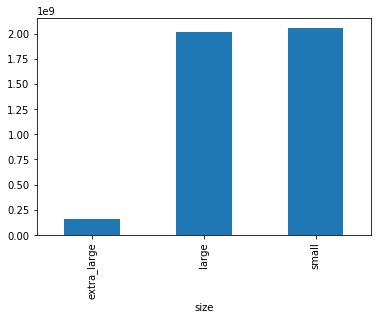

In [57]:
# Saves the "data" with the "title" and adds the .pickle
avocados = pd.read_pickle("./Datasets/Data Manipulation with Pandas/avoplotto.pkl")

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

### Changes in sales over time
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

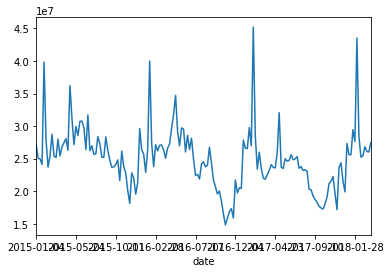

In [58]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

### Avocado supply and demand
Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

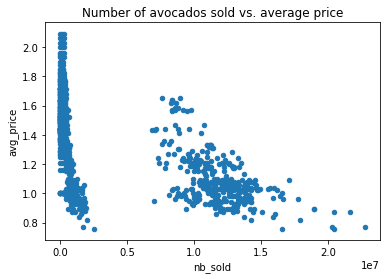

In [59]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="nb_sold", y="avg_price", kind="scatter",title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

### Price of conventional vs. organic avocados
Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

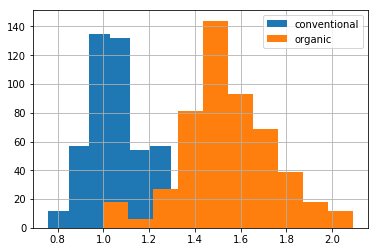

In [60]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

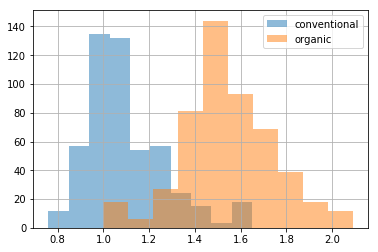

In [61]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

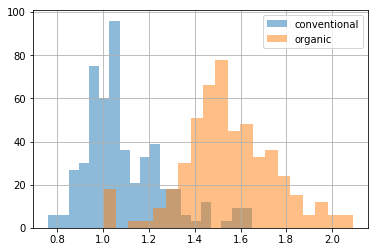

In [62]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### Finding missing values
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
5     False  False  False      False  False    False
6     False  False  False      False  False    False
7     False  False  False      False  False    False
8     False  False  False      False  False    False
9     False  False  False      False  False    False
10    False  False  False      False  False    False
11    False  False  False      False  False    False
12    False  False  False      False  False    False
13    False  False  False      False  False    False
14    False  False  False      False  False    False
15    False  False  False      False  False    False
16    False  False  False      False  False    False
17    False  False  False      False  False   

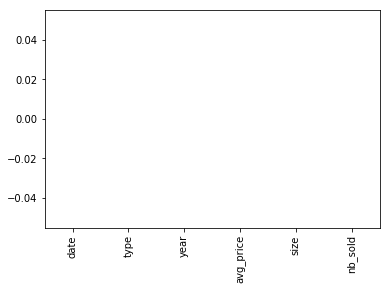

In [71]:
# Subset of avocados that contains only sales from 2016
avocados_2016 = avocados[avocados['year']=='2016']

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()

### Removing missing values
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

In [72]:
# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Replacing missing values
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:

<code>dogs[["height_cm", "weight_kg"]].hist()</code>

#List the columns with missing values
<br>cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

#Create histograms showing the distributions cols_with_missing
<br>avocados[cols_with_missing].hist()

#Show the plot
<br>plt.show()

#From previous step
<br>cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
<br>avocados[cols_with_missing].hist()
<br>plt.show()

#Fill in missing values with 0
<br>avocados_filled = avocados.fillna(0)

#Create histograms of the filled columns
<br>avocados_filled[cols_with_missing].hist()

#Show the plot
<br>plt.show()

### List of dictionaries
You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

date	small_sold	large_sold

"2019-11-03"	10376832	7835071

"2019-11-10"	10717154	8561348

In [76]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-03     7835071    10376832
1  2019-11-10     8561348    10717154


### Dictionary of lists
Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

date	small_sold	large_sold

"2019-11-17"	10859987	7674135

"2019-12-01"	9291631	6238096

In [79]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


### CSV to DataFrame
You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file <code>(airline_bumping.csv)</code> from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

#Read CSV as DataFrame called airline_bumping
<br>airline_bumping = pd.read_csv("airline_bumping.csv")

#Take a look at the DataFrame
<br>print(airline_bumping.head())

#From previous step
<br>airline_bumping = pd.read_csv("airline_bumping.csv")
<br>print(airline_bumping.head())

#For each airline, select nb_bumped and total_passengers and sum
<br>airline_totals = airline_bumping.groupby("airline")[["nb_bumped","total_passengers"]].sum()

#From previous steps
<br>airline_bumping = pd.read_csv("airline_bumping.csv")
<br>print(airline_bumping.head())
<br>airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

#Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
<br>airline_totals["bumps_per_10k"] = (airline_totals["nb_bumped"] / airline_totals["total_passengers"]) * 10000

#From previous steps
<br>airline_bumping = pd.read_csv("airline_bumping.csv")
<br>print(airline_bumping.head())
<br>airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()
<br>airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

#Print airline_totals
<br>print (airline_totals)

### DataFrame to CSV
You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

#Create airline_totals_sorted
<br>airline_totals_sorted = airline_totals.sort_values("bumps_per_10k", ascending=False)

#Print airline_totals_sorted
<br>print (airline_totals_sorted)

#Save as airline_totals_sorted.csv
<br>airline_totals_sorted.to_csv("airline_totals_sorted.csv")